# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Reiza Hersa Dwitama
- **Email:** reiza.dwitama12@gmail.com
- **ID Dicoding:** reizadwitama

## Menentukan Pertanyaan Bisnis

- Kapan puncak jumlah orang terbanyak yang menyewa sepeda
- Sepeda yang banyak disewa lebih sering digunakan untuk apa

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("bike_sharing_dataset/day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("bike_sharing_dataset/hour.csv")
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output code di atas dapat dilihat pada kolom "dteday" belum ber-tipedata DateTime

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Begitu pula di data day_df di atas pada kolom "dteday" belum ber-tipedata DateTime

In [8]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Mengatasi masalah tipe data pada data day_df dan hour_df

In [10]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Berdasarkan data diatas, kita memperoleh informasi penyewaan sepeda harian selama 731 hari dengan rata-rata penyewaan sepeda harian yaitu 4505 orang penyewa yang berlangganan maupun yang tidak

In [15]:
print("Jumlah penyewa sepeda yang tidak berlangganan = "+ str(day_df.casual.sum()))

Jumlah penyewa sepeda yang tidak berlangganan = 620017


In [16]:
print("Jumlah penyewa sepeda yang berlangganan = "+ str(day_df.registered.sum()))

Jumlah penyewa sepeda yang berlangganan = 2672662


In [17]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"],
    "registered":["max", "min", "mean", "std"],
    "cnt":["max", "min", "mean", "std"]
})

instant casual                               registered       \
       nunique    max  min         mean         std        max  min   
season                                                                
1          181   3155    9   334.928177  387.655561       5315  416   
2          184   3410  120  1106.097826  737.590829       6456  674   
3          188   3160  118  1202.611702  595.975032       6917  889   
4          178   3031    2   729.112360  606.318118       6946   20   

                                   cnt                                  
               mean          std   max   min         mean          std  
season                                                                  
1       2269.204420  1200.269751  7836   431  2604.132597  1399.942119  
2       3886.233696  1353.375628  8362   795  4992.331522  1695.977235  
3       4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
4       3999.050562  1444.782557  8555    22  4728.162921  1699.615261

Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat banyak orang yang menyewa sepeda pada musim 2 dan 3 (Musim Panas dan Musim Gugur) dari kedua jenis penyewa sepeda

In [18]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "casual": ["sum"]
}).sort_values(by=('casual', 'sum'), ascending=False)

,instant,casual
,nunique,sum
weekday,,
6,105,153852
0,105,140521
5,104,78238
1,105,70784
4,104,61460
2,104,57843
3,104,57319


Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat banyak penyewa sepeda yang tidak berlangganan pada hari Sabtu, Minggu, dan Jumat.

In [19]:
day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "registered": ["sum"]
}).sort_values(by=('registered', 'sum'), ascending=False)

,instant,registered
,nunique,sum
weekday,,
4,104,423935
3,104,415729
2,104,411266
5,104,409552
1,105,384719
6,105,323955
0,105,303506


Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat banyak penyewa berlangganan yang menyewa sepeda pada hari Jumat, Selasa dan Sabtu.

In [20]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["sum"]
}).sort_values(by=('casual', 'sum'), ascending=False)

,instant,casual
,nunique,sum
hr,,
14,729,55089
15,729,54606
17,730,54220
16,730,53834
13,729,52713
12,728,49718
18,728,44496
11,727,43286


Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat banyak penyewa yang tidak berlangganan yang menyewa sepeda pada waktu siang dan sore hari.

In [21]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "registered": ["sum"]
}).sort_values(by=('registered', 'sum'), ascending=False)

,instant,registered
,nunique,sum
hr,,
17,730,282640
18,728,265276
8,727,245240
19,728,191284
16,730,173914
7,727,146134
20,728,138172
9,727,136980


Berdasarkan pivot table di atas, dapat diketahui bahwa terdapat banyak orang terdaftar yang menyewa sepeda pada waktu pagi dan sore hari.

## Visualization & Explanatory Analysis

In [22]:
monthly_casual_df = day_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "casual": "sum"
})
monthly_casual_df.index = monthly_casual_df.index.strftime('%B')
monthly_casual_df = monthly_casual_df.reset_index()


monthly_casual_df.rename(columns={
    "dteday": "Month",
    "casual": "Casual Total"
}, inplace=True)
df_casual1 = monthly_casual_df.loc[:12]
df_casual2 = monthly_casual_df.loc[12:]

C:\Users\ReizaDwitama\AppData\Local\Temp\ipykernel_19956\1475017967.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_casual_df = day_df.resample(rule='M', on='dteday').agg({


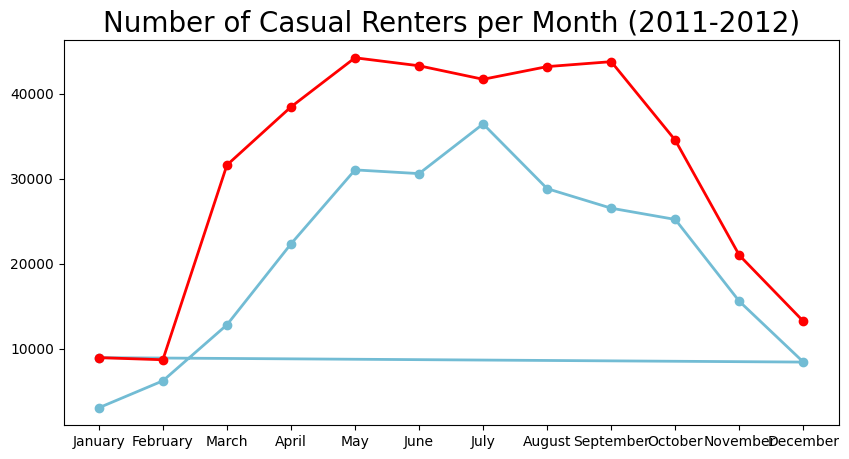

In [23]:
plt.figure(figsize=(10, 5)) 
plt.plot(df_casual1["Month"], df_casual1["Casual Total"], marker='o', linewidth=2, color="#72BCD4", label="Tahun 2011") 
plt.plot(df_casual2["Month"], df_casual2["Casual Total"], marker='o', linewidth=2, color="red", label="Tahun 2012")
plt.title("Number of Casual Renters per Month (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

- Biru = Tahun 2011
- Merah = Tahun 2012
- Dapat dilihat dari data di atas bahwa banyak penyewa yang tidak berlangganan menyewa sepeda di pertengahan tahun

In [24]:
monthly_registered_df = day_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "registered": "sum"
})
monthly_registered_df.index = monthly_registered_df.index.strftime('%B')
monthly_registered_df = monthly_registered_df.reset_index()


monthly_registered_df.rename(columns={
    "dteday": "Month",
    "registered": "Registered Total"
}, inplace=True)
df_registered1 = monthly_registered_df.loc[:12]
df_registered2 = monthly_registered_df.loc[12:]

C:\Users\ReizaDwitama\AppData\Local\Temp\ipykernel_19956\2307728324.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_registered_df = day_df.resample(rule='M', on='dteday').agg({


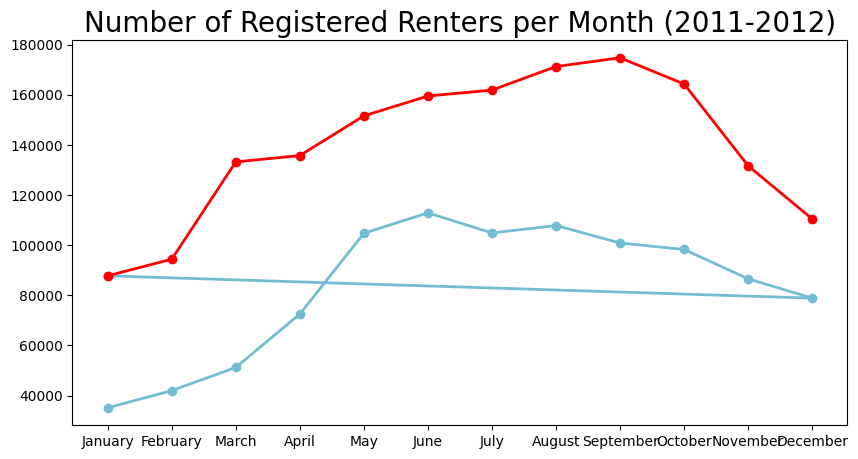

In [25]:
plt.figure(figsize=(10, 5)) 
plt.plot(df_registered1["Month"], df_registered1["Registered Total"], marker='o', linewidth=2, color="#72BCD4", label="Tahun 2011") 
plt.plot(df_registered2["Month"], df_registered2["Registered Total"], marker='o', linewidth=2, color="red", label="Tahun 2012")
plt.title("Number of Registered Renters per Month (2011-2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

- Biru = Tahun 2011
- Merah = Tahun 2012
- Dari data diatas dapat disimpulkan bahwa banyak orang terdaftar yang menyewa sepeda di bulan Juni 2011 dan September 2012
  

In [26]:
daily_casual_df = day_df.resample(rule='D', on='dteday').agg({
    "instant": "nunique",
    "casual": "sum",
})
daily_casual_df.index = daily_casual_df.index.strftime('%A')
daily_casual_df = daily_casual_df.reset_index()


daily_casual_df.rename(columns={
    "dteday": "Day",
    "casual": "Casual Total"
}, inplace=True)
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_casual_df_grouped = daily_casual_df.groupby(by="Day").sum().reindex(new_order)
daily_casual_df_grouped.head(7)

,instant,Casual Total
Day,,
Monday,105,70784
Tuesday,104,57843
Wednesday,104,57319
Thursday,104,61460
Friday,104,78238
Saturday,105,153852
Sunday,105,140521


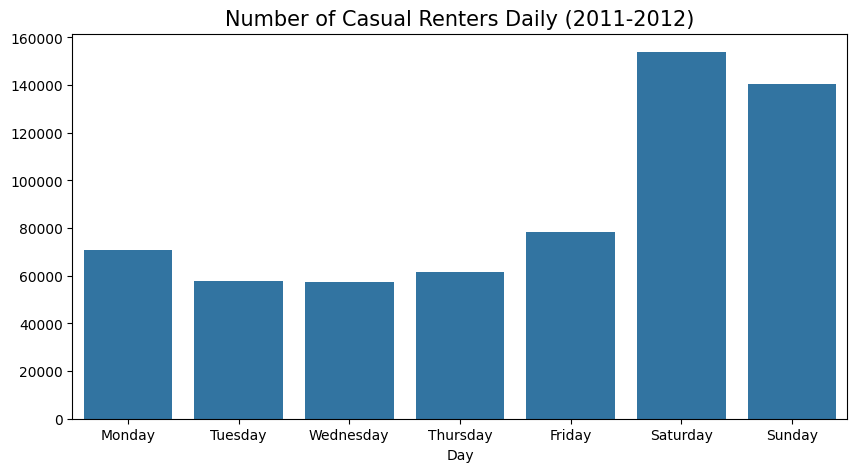

In [27]:
sns.color_palette("husl", n_colors=len(daily_casual_df_grouped))

plt.figure(figsize=(10, 5))
sns.barplot(
    y="Casual Total", 
    x="Day",
    data=daily_casual_df_grouped,
)
plt.title("Number of Casual Renters Daily (2011-2012)", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

Dari visualisasi data di atas dapat disimpulkan bahwa orang casual sering menyewa sepeda di akhir minggu (weekend)

In [28]:
daily_registered_df = day_df.resample(rule='D', on='dteday').agg({
    "instant": "nunique",
    "registered": "sum",
})
daily_registered_df.index = daily_registered_df.index.strftime('%A')
daily_registered_df = daily_registered_df.reset_index()


daily_registered_df.rename(columns={
    "dteday": "Day",
    "registered": "Registered Total"
}, inplace=True)
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_registered_df_grouped = daily_registered_df.groupby(by="Day").sum().reindex(new_order)
daily_registered_df_grouped.head(7)

,instant,Registered Total
Day,,
Monday,105,384719
Tuesday,104,411266
Wednesday,104,415729
Thursday,104,423935
Friday,104,409552
Saturday,105,323955
Sunday,105,303506


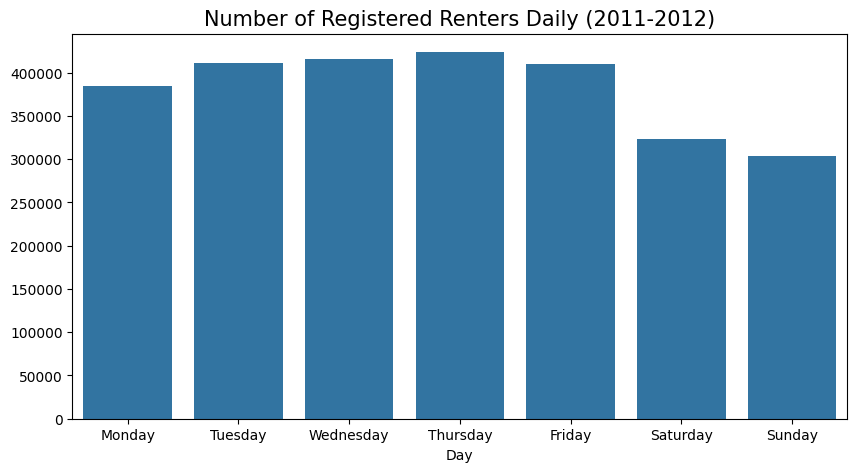

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="Registered Total", 
    x="Day",
    data=daily_registered_df_grouped,
)
plt.title("Number of Registered Renters Daily (2011-2012)", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

Dari visualisasi data di atas dapat disimpulkan bahwa orang yang tidak berlangganan sering menyewa sepeda di hari kerja

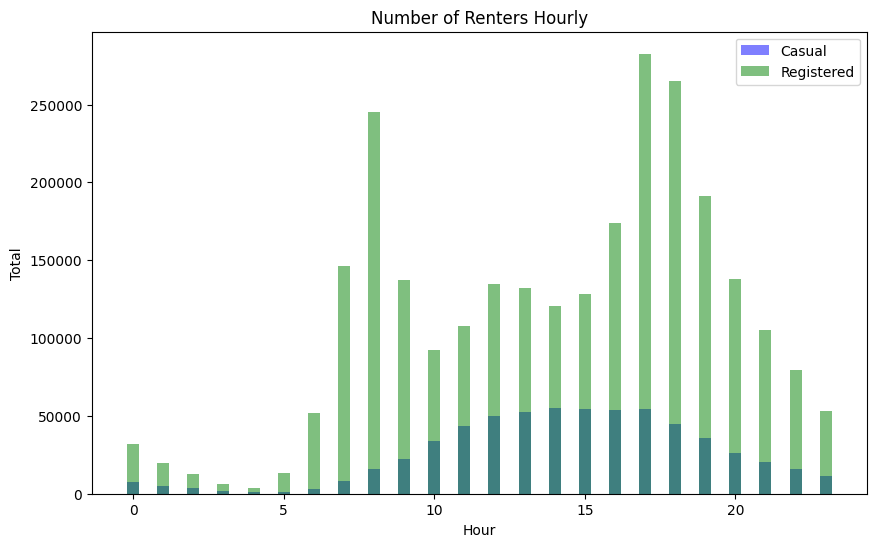

In [30]:
hourly_df_grouped = hour_df.groupby(by="hr").agg({
    "instant" : "nunique",
    "casual":"sum",
    "registered":"sum",
    "cnt":"sum"
})

plt.figure(figsize=(10, 6))
plt.bar(hourly_df_grouped.index, hourly_df_grouped['casual'], color='blue', alpha=0.5, width=0.4)
plt.bar(hourly_df_grouped.index, hourly_df_grouped['registered'], color='green', alpha=0.5, width=0.4)
plt.xlabel('Hour')
plt.ylabel('Total')
plt.title('Number of Renters Hourly')
plt.legend(['Casual', 'Registered'])
plt.show()

Dari visualisasi data diatas, dapat disimpulkan bahwa jumlah penyewa sepeda yang tidak berlangganan memuncak pada pukul 14 dan 15. Namun, jumlah penyewa yang berlangganan memuncak pada pukul 8 dan 17.

In [31]:
holiday_casual_df = day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "casual": "mean",
})
holiday_casual_df.index = holiday_casual_df.index.map({0: "No", 1: "Yes"})
print(holiday_casual_df)

         instant       casual
holiday                      
No           710   841.771831
Yes           21  1064.714286


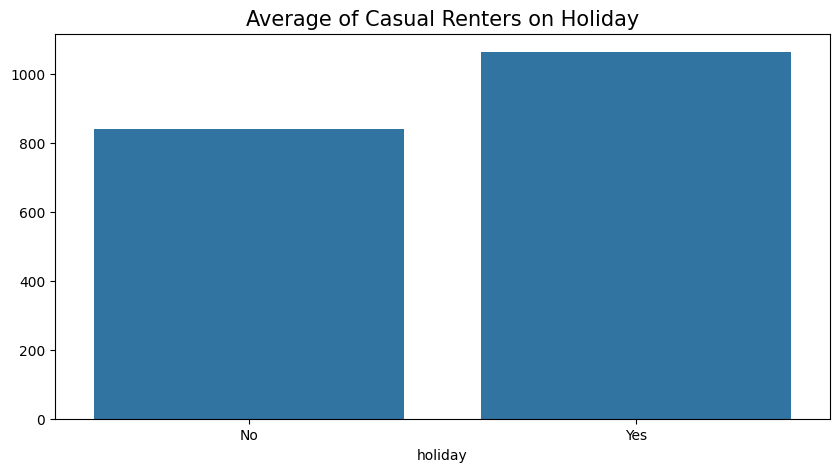

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="casual", 
    x="holiday",
    data=holiday_casual_df
)
plt.title("Average of Casual Renters on Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

In [34]:
holiday_registered_df = day_df.groupby(by="holiday").agg({
    "instant": "nunique",
    "registered": "mean",
})
holiday_registered_df.index = holiday_registered_df.index.map({0: "No", 1: "Yes"})
print(holiday_registered_df)

         instant   registered
holiday                      
No           710  3685.332394
Yes           21  2670.285714


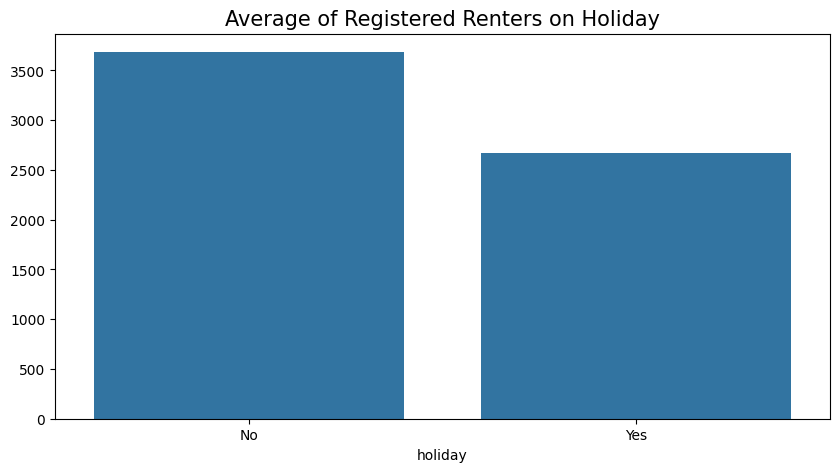

In [36]:
plt.figure(figsize=(10, 5))
sns.barplot(
    y="registered", 
    x="holiday",
    data=holiday_registered_df
)
plt.title("Average of Registered Renters on Holiday", loc="center", fontsize=15)
plt.ylabel(None)
plt.show()

### Pertanyaan 1:

Ada dua jenis penyewa sepeda yaitu yang berlangganan dan tidak. Jumlah penyewa yang berlangganan memuncak tiap hari kamis dan menurun di hari sabtu sedangkan jumlah penyewa yang tidak berlangganan memuncak di hari sabtu dan meurun mulai dari hari senin. selain itu jumlah penyewa sepeda yang tidak berlangganan memuncak pada pukul 14 dan 15. Namun, jumlah penyewa yang berlangganan memuncak pada pukul 8 dan 17.

### Pertanyaan 2:

Penyewa yang berlangganan lebih banyak menggunakan sepeda di hari kerja sehingga dapat disimpulkan bahwa sepeda tersebut digunakan untuk bepergian ke tempat kerja. Namun, penyewa yang tidak berlangganan lebih sering menggunakan sepeda di akhir pekan dan hari libur sehingga dapat disimpulkan bahwa mereka menggunakan sepeda untuk hiburan dan berkunjung ke suatu tempat

## Conclusion

- Conclution pertanyaan 1
- dilihat dari
- Conclution pertanyaan 2
- Dari sekian banyak data, orang banyak menyewa dan menggunakan sepeda di sore hari dan juga di akhir pekan. Biasanya orang yang menyewa sepeda di waktu itu bukan penyewa berlangganan